# Ddareungi Challenge

한 시간 전 데이터를 통해 현재의 자전거 대여량 예측하기

#table_of_contents

## Import package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import sys
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df_train = pd.read_csv('../../../input/ddareung/train.csv')
df_test = pd.read_csv('../../../input/ddareung/test.csv')

In [3]:
df_train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
df_test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
print(df_train.shape)
print(df_test.shape)

(1459, 11)
(715, 10)


### Column 자료형 확인

- infro() : 각 column 정보 보기

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


## Exploratory Data Analysis (EDA)

### missing data
- hour_bef_temperature (2 missings)
- hour_bef_precipitation 
- hour_bef_humidity
- hour_bef_visibility
- hour_bef_windspeed (9 missings)
- hour_bef_ozone (76 missings)
- hour_bef_pm10 (90 missings)
- hour_bef_pm2.5 (117 missings)

<AxesSubplot:>

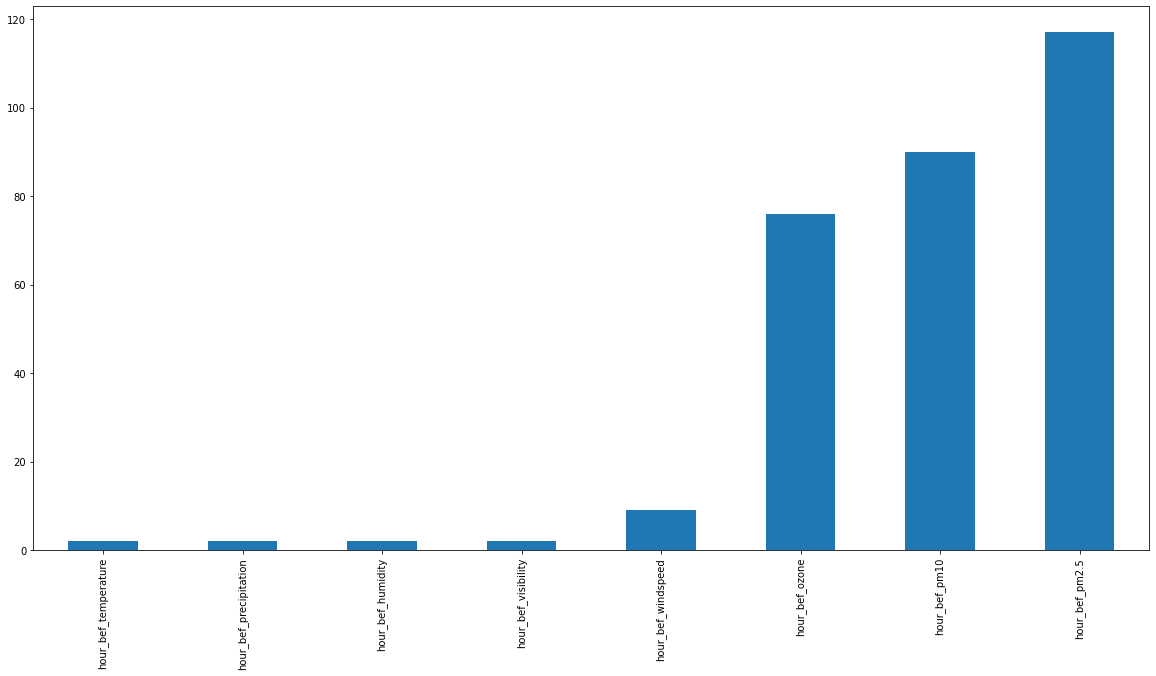

In [8]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (20,10))

시간대별 대여수 파악

<AxesSubplot:xlabel='hour'>

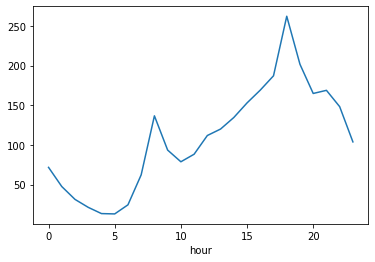

In [9]:
df_train.groupby('hour').mean()['count'].plot()

### Visualization

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Text(18, 250, 'peak2')

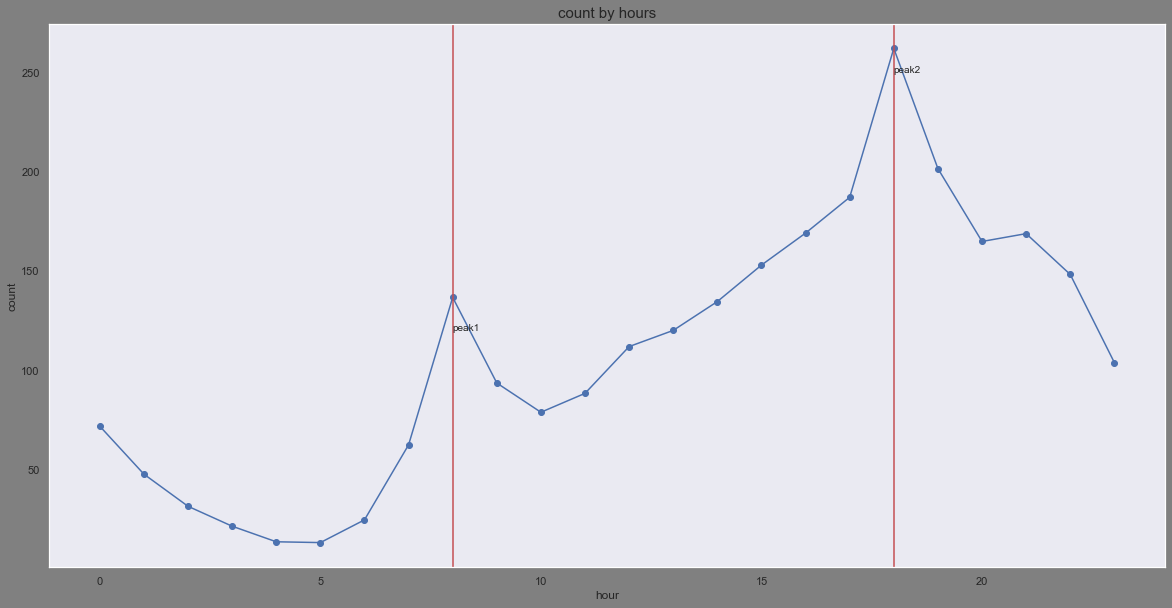

In [11]:
plt.figure(figsize = (20,10), facecolor='gray')
plt.plot(df_train.groupby('hour').mean()['count'], 'bo-')
plt.grid()

plt.title('count by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.axvline(8, color='r')
plt.axvline(18, color='r')
plt.text(8,120,'peak1',fontsize=10)
plt.text(18,250,'peak2',fontsize=10)


#### Correlation

In [12]:
df_train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:>

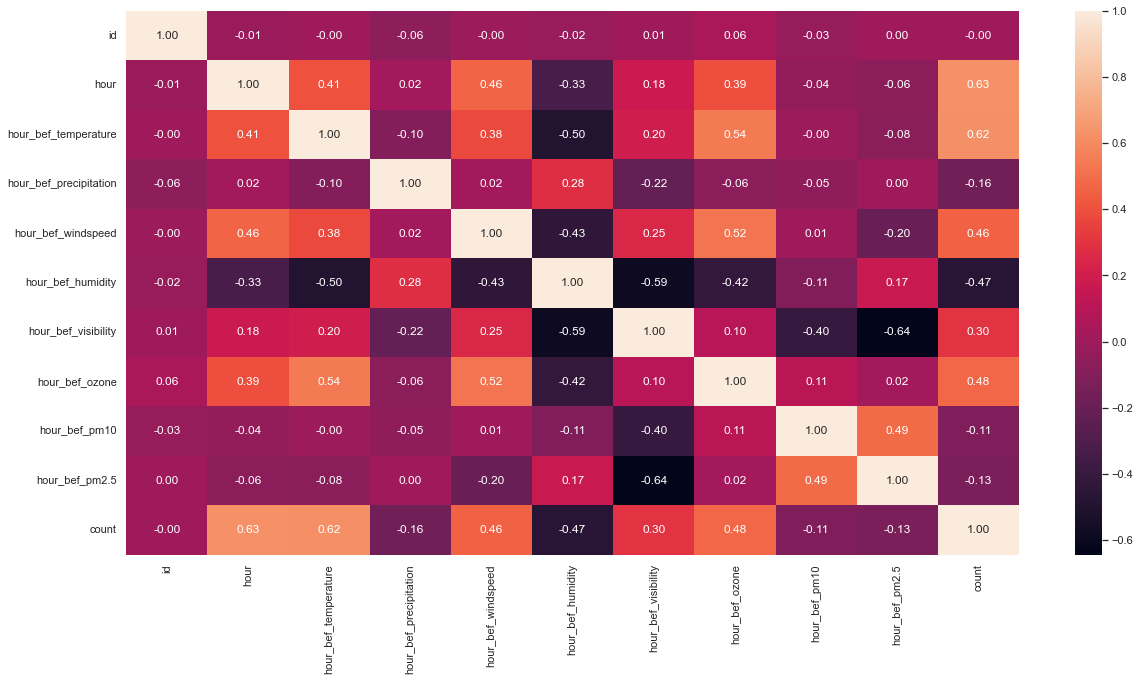

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')

=> count와 correlation이 적은 features : pm10, pm2.5, precipitation

<function matplotlib.pyplot.show(close=None, block=None)>

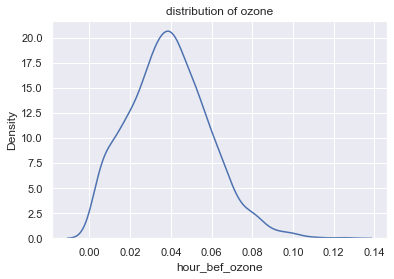

In [14]:
sns.kdeplot(df_train['hour_bef_ozone'])
plt.title("distribution of ozone")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

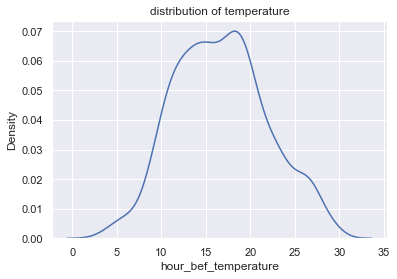

In [15]:
sns.kdeplot(df_train['hour_bef_temperature'])
plt.title("distribution of temperature")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

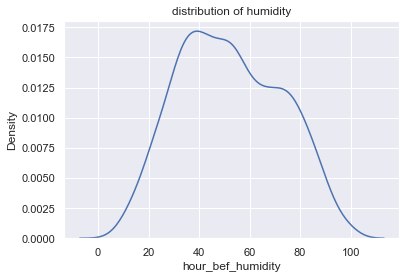

In [16]:
sns.kdeplot(df_train['hour_bef_humidity'])
plt.title("distribution of humidity")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

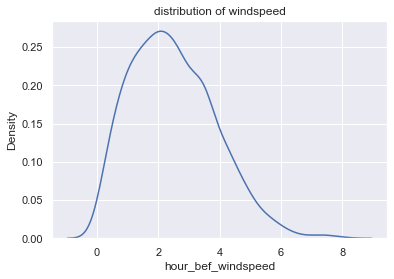

In [17]:
sns.kdeplot(df_train['hour_bef_windspeed'])
plt.title("distribution of windspeed")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

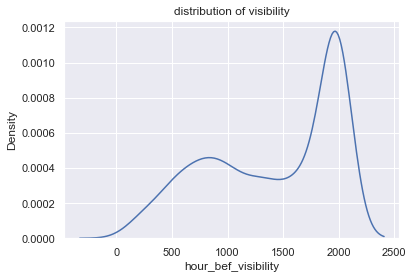

In [18]:
sns.kdeplot(df_train['hour_bef_visibility'])
plt.title("distribution of visibility")
plt.show

## PreProcessing

train, test data set 통합하여 다루기

In [19]:
df_train_and_test = [df_train, df_test]

missing data 채우기

temperature, percipitation, humidity, windspeed

In [20]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [21]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [23]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [25]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [27]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
32,82,1,22.8,0.0,2.4,52.0,2000.0,NaN,NaN,NaN
40,115,1,21.5,1.0,0.5,90.0,347.0,NaN,NaN,NaN
47,147,1,22.8,0.0,1.2,57.0,1190.0,NaN,NaN,NaN
86,260,1,20.0,0.0,2.0,65.0,1662.0,NaN,NaN,NaN
92,270,1,20.0,0.0,1.7,31.0,2000.0,NaN,NaN,NaN
102,297,1,15.1,1.0,2.2,98.0,224.0,NaN,NaN,NaN
114,323,1,18.7,0.0,1.4,41.0,2000.0,NaN,NaN,NaN
126,352,1,19.2,0.0,1.4,80.0,1085.0,NaN,NaN,NaN
129,358,1,23.6,0.0,0.9,83.0,466.0,NaN,NaN,NaN
209,609,1,18.6,0.0,2.4,37.0,2000.0,NaN,NaN,NaN


In [28]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


test set 결측치 채우기

1. Deletion
2. Imputation
    - Mean Imputation
    - Substitution
    - Hot deck imputation : 다른 변수에서 비슷한 값을 갖는 데이터 중에서 하나를 랜덤 샘플링하여 복사함
    - Cold deck imputation : 비슷한 양상의 데이터 중에서 하나를 랜덤 샘플링하는 것이 아니라 어떠한 규칙 하에서 복사할 값을 선정함
    - Regression imputation : 
    - Stochastic regression imputation : 
    - Interpolation and extrapolation :

1. windspeed

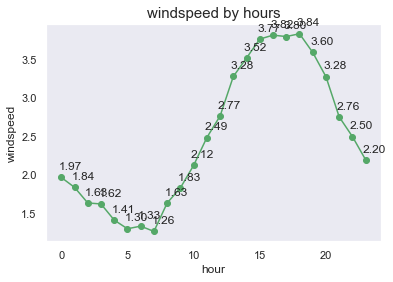

In [29]:
windspeedPerHous = df_train.groupby('hour').mean()['hour_bef_windspeed']

plt.plot(windspeedPerHous, 'go-')
plt.grid()

plt.title('windspeed by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('windspeed', fontsize=12)

for i in range(0, len(windspeedPerHous)):
    plt.text(i-0.2, windspeedPerHous[i]+0.1, f'{windspeedPerHous[i]:.2f}')

In [30]:
for i in range(0,len(windspeedPerHous)):
    print(f'[{i}] hour : {windspeedPerHous[i]:.3f}')

[0] hour : 1.966
[1] hour : 1.837
[2] hour : 1.633
[3] hour : 1.620
[4] hour : 1.410
[5] hour : 1.297
[6] hour : 1.331
[7] hour : 1.262
[8] hour : 1.633
[9] hour : 1.830
[10] hour : 2.123
[11] hour : 2.485
[12] hour : 2.767
[13] hour : 3.281
[14] hour : 3.523
[15] hour : 3.769
[16] hour : 3.820
[17] hour : 3.802
[18] hour : 3.838
[19] hour : 3.595
[20] hour : 3.278
[21] hour : 2.755
[22] hour : 2.498
[23] hour : 2.195


In [31]:
windspeedNanIndx = df_train['hour_bef_windspeed'].index[df_train['hour_bef_windspeed'].apply(np.isnan)]
windspeedNanIndx

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [32]:
for fill_idx in range(0,len(windspeedNanIndx)):
    tmp_hour = df_train_and_test[0]['hour'][windspeedNanIndx[fill_idx]]
    df_train_and_test[0]['hour_bef_windspeed'][windspeedNanIndx[fill_idx]] = windspeedPerHous[tmp_hour]

In [33]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [34]:
windspeedNanIndx_test = df_test['hour_bef_windspeed'].index[df_test['hour_bef_windspeed'].apply(np.isnan)]
windspeedNanIndx_test

Int64Index([653], dtype='int64')

In [35]:
for fill_idx in range(0,len(windspeedNanIndx_test)):
    tmp_hour = df_train_and_test[1]['hour'][windspeedNanIndx_test[fill_idx]]
    df_train_and_test[1]['hour_bef_windspeed'][windspeedNanIndx_test[fill_idx]] = windspeedPerHous[tmp_hour]

In [36]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


2. temperature

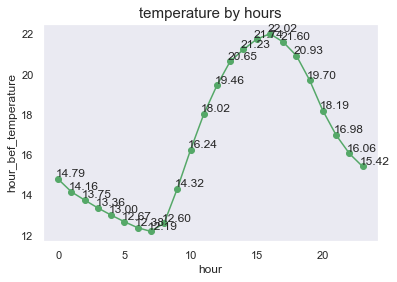

In [37]:
tmperaturePerHour = df_train.groupby('hour').mean()['hour_bef_temperature']

plt.plot(tmperaturePerHour, 'go-')
plt.grid()

plt.title('temperature by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('hour_bef_temperature', fontsize=12)

for i in range(0, len(tmperaturePerHour)):
    plt.text(i-0.2, tmperaturePerHour[i]+0.1, f'{tmperaturePerHour[i]:.2f}')

In [38]:
for i in range(0,len(tmperaturePerHour)):
    print(f'[{i}] hour : {tmperaturePerHour[i]:.3f}')

[0] hour : 14.788
[1] hour : 14.156
[2] hour : 13.748
[3] hour : 13.357
[4] hour : 13.002
[5] hour : 12.674
[6] hour : 12.377
[7] hour : 12.192
[8] hour : 12.600
[9] hour : 14.318
[10] hour : 16.243
[11] hour : 18.020
[12] hour : 19.457
[13] hour : 20.648
[14] hour : 21.234
[15] hour : 21.744
[16] hour : 22.015
[17] hour : 21.603
[18] hour : 20.927
[19] hour : 19.705
[20] hour : 18.192
[21] hour : 16.978
[22] hour : 16.064
[23] hour : 15.418


In [39]:
temperature_nanIdx_train = df_train['hour_bef_temperature'].index[df_train['hour_bef_temperature'].apply(np.isnan)]
temperature_nanIdx_test = df_test['hour_bef_temperature'].index[df_test['hour_bef_temperature'].apply(np.isnan)]

for fill_idx in range(0,len(temperature_nanIdx_train)):
    tmp_hour = df_train_and_test[0]['hour'][temperature_nanIdx_train[fill_idx]]
    df_train_and_test[0]['hour_bef_temperature'][temperature_nanIdx_train[fill_idx]] = tmperaturePerHour[tmp_hour]

for fill_idx in range(0,len(temperature_nanIdx_test)):
    tmp_hour = df_train_and_test[1]['hour'][temperature_nanIdx_test[fill_idx]]
    df_train_and_test[1]['hour_bef_temperature'][temperature_nanIdx_test[fill_idx]] = tmperaturePerHour[tmp_hour]

In [40]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [41]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


3. humidity

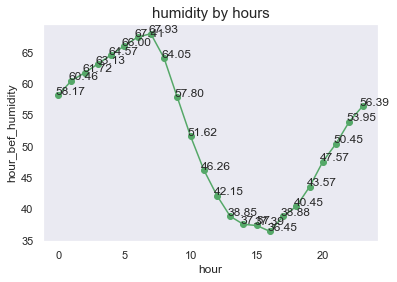

In [42]:
humidityPerHour = df_train.groupby('hour').mean()['hour_bef_humidity']

plt.plot(humidityPerHour, 'go-')
plt.grid()

plt.title('humidity by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('hour_bef_humidity', fontsize=12)

for i in range(0, len(humidityPerHour)):
    plt.text(i-0.2, humidityPerHour[i]+0.1, f'{humidityPerHour[i]:.2f}')

In [43]:
humidity_nanIdx_train = df_train['hour_bef_humidity'].index[df_train['hour_bef_humidity'].apply(np.isnan)]
humidity_nanIdx_test = df_test['hour_bef_humidity'].index[df_test['hour_bef_humidity'].apply(np.isnan)]

for fill_idx in range(0,len(humidity_nanIdx_train)):
    tmp_hour = df_train_and_test[0]['hour'][humidity_nanIdx_train[fill_idx]]
    df_train_and_test[0]['hour_bef_humidity'][humidity_nanIdx_train[fill_idx]] = humidityPerHour[tmp_hour]

for fill_idx in range(0,len(humidity_nanIdx_test)):
    tmp_hour = df_train_and_test[1]['hour'][humidity_nanIdx_test[fill_idx]]
    df_train_and_test[1]['hour_bef_humidity'][humidity_nanIdx_test[fill_idx]] = humidityPerHour[tmp_hour]

In [44]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [45]:
df_train_and_test[1][df_train_and_test[1]['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5


4. ozone

posx and posy should be finite values
posx and posy should be finite values


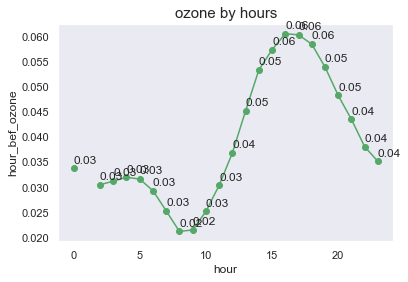

In [46]:
ozonePerHour = df_train.groupby('hour').mean()['hour_bef_ozone']

plt.plot(ozonePerHour, 'go-')
plt.grid()

plt.title('ozone by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('hour_bef_ozone', fontsize=12)

for i in range(0, len(ozonePerHour)):
    plt.text(i-0.002, ozonePerHour[i]+0.001, f'{ozonePerHour[i]:.2f}')

In [47]:
for i in range(0,len(ozonePerHour)):
    print(f'[{i}] hour : {ozonePerHour[i]:.3f}')

[0] hour : 0.034
[1] hour : nan
[2] hour : 0.030
[3] hour : 0.031
[4] hour : 0.032
[5] hour : 0.032
[6] hour : 0.029
[7] hour : 0.025
[8] hour : 0.021
[9] hour : 0.021
[10] hour : 0.025
[11] hour : 0.030
[12] hour : 0.037
[13] hour : 0.045
[14] hour : 0.053
[15] hour : 0.057
[16] hour : 0.061
[17] hour : 0.060
[18] hour : 0.059
[19] hour : 0.054
[20] hour : 0.048
[21] hour : 0.044
[22] hour : 0.038
[23] hour : 0.035


In [48]:
ozonePerHour[1] = 0

In [49]:
ozone_nanIdx_train = df_train['hour_bef_ozone'].index[df_train['hour_bef_ozone'].apply(np.isnan)]
ozone_nanIdx_test = df_test['hour_bef_ozone'].index[df_test['hour_bef_ozone'].apply(np.isnan)]

for fill_idx in range(0,len(ozone_nanIdx_train)):
    tmp_hour = df_train_and_test[0]['hour'][ozone_nanIdx_train[fill_idx]]
    df_train_and_test[0]['hour_bef_ozone'][ozone_nanIdx_train[fill_idx]] = ozonePerHour[tmp_hour]

for fill_idx in range(0,len(ozone_nanIdx_test)):
    tmp_hour = df_train_and_test[1]['hour'][ozone_nanIdx_test[fill_idx]]
    df_train_and_test[1]['hour_bef_ozone'][ozone_nanIdx_test[fill_idx]] = ozonePerHour[tmp_hour]

In [50]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


5. visibility

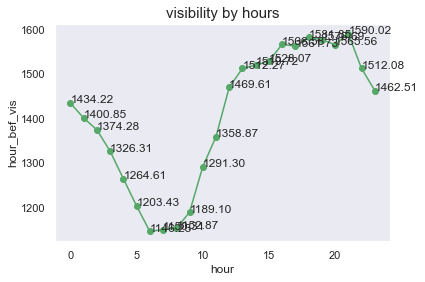

In [51]:
visPerHour = df_train.groupby('hour').mean()['hour_bef_visibility']

plt.plot(visPerHour, 'go-')
plt.grid()

plt.title('visibility by hours', fontsize = 15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('hour_bef_vis', fontsize=12)

for i in range(0, len(visPerHour)):
    plt.text(i-0.0002, visPerHour[i]+0.0001, f'{visPerHour[i]:.2f}')

In [52]:
vis_nanIdx_train = df_train['hour_bef_visibility'].index[df_train['hour_bef_visibility'].apply(np.isnan)]
vis_nanIdx_test = df_test['hour_bef_visibility'].index[df_test['hour_bef_visibility'].apply(np.isnan)]

for fill_idx in range(0,len(vis_nanIdx_train)):
    tmp_hour = df_train_and_test[0]['hour'][vis_nanIdx_train[fill_idx]]
    df_train_and_test[0]['hour_bef_visibility'][vis_nanIdx_train[fill_idx]] = visPerHour[tmp_hour]

for fill_idx in range(0,len(vis_nanIdx_test)):
    tmp_hour = df_train_and_test[1]['hour'][vis_nanIdx_test[fill_idx]]
    df_train_and_test[1]['hour_bef_visibility'][vis_nanIdx_test[fill_idx]] = visPerHour[tmp_hour]

In [53]:
df_train_and_test[0][df_train_and_test[0]['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


feature drop

In [54]:
features_drop=['hour_bef_precipitation','hour_bef_pm10','hour_bef_pm2.5','hour_bef_ozone']

In [55]:
df_train_and_test[0]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


Catergorization

In [56]:
df_train=df_train_and_test[0].drop(features_drop,axis=1)
df_test=df_train_and_test[1].drop(features_drop,axis=1)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1459 non-null   int64  
 1   hour                  1459 non-null   int64  
 2   hour_bef_temperature  1459 non-null   float64
 3   hour_bef_windspeed    1459 non-null   float64
 4   hour_bef_humidity     1459 non-null   float64
 5   hour_bef_visibility   1459 non-null   float64
 6   count                 1459 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 79.9 KB


In [58]:
df_train.head()

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
0,3,20,16.3,1.5,89.0,576.0,49.0
1,6,13,20.1,1.4,48.0,916.0,159.0
2,7,6,13.9,0.7,79.0,1382.0,26.0
3,8,23,8.1,2.7,54.0,946.0,57.0
4,9,18,29.5,4.8,7.0,2000.0,431.0


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    715 non-null    int64  
 1   hour                  715 non-null    int64  
 2   hour_bef_temperature  715 non-null    float64
 3   hour_bef_windspeed    715 non-null    float64
 4   hour_bef_humidity     715 non-null    float64
 5   hour_bef_visibility   715 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 33.6 KB


In [60]:
df_test.head()

,id,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
0,0,7,20.7,1.3,62.0,954.0
1,1,17,30.0,5.4,33.0,1590.0
2,2,13,19.0,2.1,95.0,193.0
3,4,6,22.5,2.5,60.0,1185.0
4,5,22,14.6,3.4,93.0,218.0


정답지 준비

In [61]:
df_train_label = df_train['count']

In [62]:
df_train_label.head()

0     49.0
1    159.0
2     26.0
3     57.0
4    431.0
Name: count, dtype: float64

In [63]:
df_train_label.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1459 entries, 0 to 1458
Series name: count
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


train/test data set 준비

In [64]:
df_train_data = df_train.drop(['id','count'], axis=1)

In [65]:
df_train_data

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
0,20,16.3,1.5,89.0,576.0
1,13,20.1,1.4,48.0,916.0
2,6,13.9,0.7,79.0,1382.0
3,23,8.1,2.7,54.0,946.0
4,18,29.5,4.8,7.0,2000.0
...,...,...,...,...,...
1454,4,16.8,1.6,53.0,2000.0
1455,3,10.8,3.8,45.0,2000.0
1456,5,18.3,1.9,54.0,2000.0
1457,21,20.7,3.7,37.0,1395.0


In [66]:
df_test_data = df_test.drop('id', axis=1)

In [67]:
df_test_data.head()

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
0,7,20.7,1.3,62.0,954.0
1,17,30.0,5.4,33.0,1590.0
2,13,19.0,2.1,95.0,193.0
3,6,22.5,2.5,60.0,1185.0
4,22,14.6,3.4,93.0,218.0


## Prediction by Model

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [69]:
def predict_by_model(model):
    model.fit(df_train_data, df_train_label)
    prediction = model.predict(df_test_data)
    accuracy = mean_squared_error(df_train_label, model.predict(df_train_data))
    print("MSE:", np.sqrt(accuracy), "%")
    return prediction

In [70]:
lr_pred = predict_by_model(LinearRegression())

MSE: 53.7454540710541 %


In [71]:
ridge_pred = predict_by_model(Ridge())

MSE: 53.745454148795496 %


In [72]:
lasso_pred = predict_by_model(Lasso())

MSE: 53.751520294948854 %


In [75]:
xgb_pred = predict_by_model(XGBRegressor())

MSE: 6.801731604409469 %


## Submission

In [76]:
# Final prediction
predictions = xgb_pred
predictions_df = pd.DataFrame(predictions)

submission = pd.concat([df_test['id'], predictions_df], axis = 'columns')

submission.columns = ["id", "count"]
submission.to_csv('ddareungi_challenge_dg_2_xgb.csv', header=True, index=False)

## Result

XGBRegressor model score : 49.63617